## Gibbs_Sampling:

when direct sampling is difficult we use $gibbs-sampling$ as technique that allows us sampling from a multivariate distribution($joint$ distribution), it's a $MCMC$ algorithm($MCMC$ stands for Markov Chain Monte Charlo) that approximate a $marginal$ distribution, it's a technique very common in $bayesian -inference$.

## Algorithm:

this algorithm is snipped from amazing book of bishop pattern recognition and machine learning.



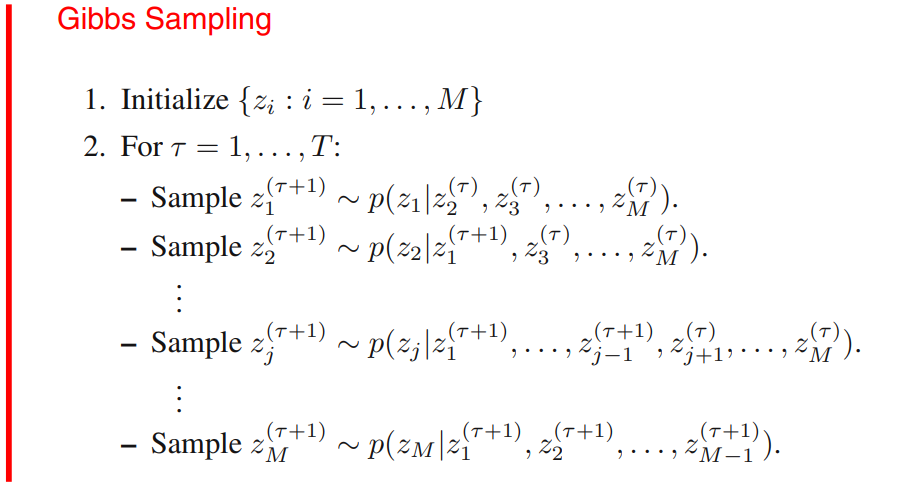

suppose we rolling two dice , and $X$ is random number that represent the number of dice's face, $Y$ is the random number obtaing by product of the result of two dice, the set of value of $X$ and $Y$ are given by:

$X(\Omega)=[1, 2, 3, 4, 5, 6 ]$ and $Y(\Omega)=[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]$

we can generate $X$ and $Y$ by the following implementation:

In [5]:
import numpy as np
from collections import Counter
from numpy.random import randint

def roll_dice():
    return randint(1, 7)
def x():
    X=roll_dice()
    assert X in np.arange(1, 7)
    return X

def y():
    Y=roll_dice()*roll_dice()
    assert Y in [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]
    return Y


we want to generalize a lot of couple $(X, Y)$ the direct method and deterministic method is giveen by:

In [6]:
def direct_sampling():
    X, Y=x(), y()
    return X, Y
    
(X, Y)=direct_sampling()
X,Y

(4, 4)

we know the random variables $X$ and $Y$ are not independent, such as $p(X, Y)=p(X/Y)p(Y)=p(Y/X)p(X)$, we must implement $p(X/Y)$ and $p(Y/X)$

In [10]:
def y_giveen_x(x):
    
    y=roll_dice()*x
    assert y in [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]
    return y

def x_giveen_y(y):
    x=round(y/roll_dice())
    if x==0 or x>6:
        return np.random.choice(np.arange(1,7))
    else:
        return x

def Gibbs_Sampling(n_iters=1000):
    x,y=6, 36
    for _ in range(n_iters):
        y=y_giveen_x(x)
        x=x_giveen_y(y)
    return x,y

X, Y=Gibbs_Sampling(n_iters=10000)
X, Y
Gibbs_list, direct_list=[], []
for i in range(100):
    X_g, Y_g=Gibbs_Sampling(n_iters=10000)
    X_d, Y_d=direct_sampling()
    Gibbs_list.append((X_g, Y_g))
    direct_list.append((X_d, Y_d))
Gibbs, direct=Counter(Gibbs_list), Counter(direct_list)
Gibbs, direct



(Counter({(2, 6): 8,
          (1, 6): 7,
          (1, 4): 6,
          (2, 12): 5,
          (1, 5): 5,
          (2, 2): 4,
          (1, 3): 4,
          (5, 15): 4,
          (2, 10): 3,
          (4, 18): 3,
          (6, 6): 3,
          (6, 30): 2,
          (1, 1): 2,
          (6, 2): 2,
          (6, 12): 2,
          (2, 4): 2,
          (5, 30): 2,
          (4, 24): 2,
          (5, 24): 2,
          (3, 12): 2,
          (2, 8): 2,
          (3, 1): 2,
          (2, 5): 2,
          (3, 15): 1,
          (3, 24): 1,
          (4, 4): 1,
          (5, 18): 1,
          (1, 2): 1,
          (2, 15): 1,
          (2, 36): 1,
          (4, 25): 1,
          (3, 2): 1,
          (4, 2): 1,
          (5, 5): 1,
          (2, 1): 1,
          (1, 36): 1,
          (6, 18): 1,
          (2, 20): 1,
          (3, 16): 1,
          (3, 20): 1,
          (6, 10): 1,
          (6, 15): 1,
          (6, 36): 1,
          (3, 30): 1,
          (5, 2): 1,
          (4, 12): 1,
        

as we see the $Gibbs$ sampling are not good estiatimation for the $direct$(actual) distribution due:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$p(X_g=X_d, Y_g=Y_d)=p(X_g=X_d)p(Y_g=X_d)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$=\dfrac{1}{6}\times\dfrac{1}{18}$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$=\dfrac{1}{108}$

anyway, we will take advantage of this technique in $topic-modeling$.